# Common DEGs and core-accessory genes

This notebook looks to see if the common DEGs, identified using [SOPHIE](https://github.com/greenelab/generic-expression-patterns/blob/master/pseudomonas_analysis/2_identify_generic_genes_pathways.ipynb) are mostly core or accessory genes.

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import os
import pandas as pd
import numpy as np
import matplotlib
import scipy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib_venn import venn2
from scripts import utils, paths

/home/alexandra/anaconda3/envs/core_acc/lib/python3.7/site-packages/matplotlib/__init__.py:886: MatplotlibDeprecationWarning: 
examples.directory is deprecated; in the future, examples will be found relative to the 'datapath' directory.
  "found relative to the 'datapath' directory.".format(key))


### Get common DEGs

In [2]:
# Read in SOPHIE identified common DEGs (PAO1 gene ids)
common_DEGs_filename = paths.COMMON_DEGS

common_DEGs = pd.read_csv(common_DEGs_filename, sep="\t", index_col=0, header=0)

In [3]:
print(common_DEGs.shape)
common_DEGs.head()

(834, 3)


,Percentile (simulated),prop DEGs,gene id
ProbeID,,,
PA2618_at,97.566691,90.007215,PA2618
PA3479_rhlA_at,85.940880,98.890693,PA3479
PA0512_at,96.268926,74.918831,PA0512
PA3187_at,88.626532,87.626263,PA3187
PA5191_at,86.571738,74.918831,PA5191


In [4]:
common_DEGs = common_DEGs.set_index("gene id")

### Get core/accessory annotations

In [5]:
# Read in expression data
pao1_expression_filename = paths.PAO1_COMPENDIUM
pa14_expression_filename = paths.PA14_COMPENDIUM

pao1_expression = pd.read_csv(pao1_expression_filename, sep="\t", index_col=0, header=0)
pa14_expression = pd.read_csv(pa14_expression_filename, sep="\t", index_col=0, header=0)

Note: Core and accessory annotations are from [BACTOME](https://academic.oup.com/nar/article/47/D1/D716/5112984). Not all core genes are measured by our expression dataset ("my dataset") we're using, so there may be a difference in "Number of PAO1 core genes" (core genes from BACTOME) and "Number of PAO1 core genes in my dataset" (core genes that are found in my expression dataset.

In [6]:
pao1_annot_filename = paths.GENE_PAO1_ANNOT
pa14_annot_filename = paths.GENE_PA14_ANNOT

core_acc_dict = utils.get_my_core_acc_genes(
    pao1_annot_filename, pa14_annot_filename, pao1_expression, pa14_expression
)

Number of PAO1 core genes: 5366
Number of PA14 core genes: 5363
Number of PAO1 core genes in my dataset: 5361
Number of PA14 core genes in my dataset: 5357
Number of PAO1-specific genes: 202
Number of PA14-specific genes: 534


In [7]:
pao1_core = core_acc_dict["core_pao1"]
pa14_core = core_acc_dict["core_pa14"]
pao1_acc = core_acc_dict["acc_pao1"]
pa14_acc = core_acc_dict["acc_pa14"]

### Are common genes mostly core or accessory?

In [8]:
# Get shared gene ids
shared_acc = common_DEGs.index.intersection(pao1_acc)
shared_core = common_DEGs.index.intersection(pao1_core)

In [9]:
common_DEGs.loc[shared_acc, "gene group"] = "accessory"
common_DEGs.loc[shared_core, "gene group"] = "core"

In [10]:
common_DEGs["gene group"].value_counts()

core         806
accessory     27
Name: gene group, dtype: int64

In [11]:
# Add gene name
pao1_gene_annot = pd.read_csv(pao1_annot_filename, index_col=0, header=0)
pao1_gene_annot = pao1_gene_annot["Name"].to_frame("gene name")

In [12]:
common_DEGs_label = common_DEGs.merge(
    pao1_gene_annot, left_index=True, right_index=True
)

In [13]:
common_DEGs_label

,Percentile (simulated),prop DEGs,gene group,gene name
PA2618,97.566691,90.007215,core,NaN
PA3479,85.940880,98.890693,core,rhlA
PA0512,96.268926,74.918831,core,nirH
PA3187,88.626532,87.626263,core,NaN
PA5191,86.571738,74.918831,core,NaN
...,...,...,...,...
PA1088,87.653208,74.918831,core,NaN
PA1999,99.333093,98.890693,core,dchA
PA4298,93.574261,65.773810,core,NaN
PA1473,92.132300,70.571789,core,NaN


### Venn diagram

In [14]:
common_DEGs_set = set(common_DEGs.index)
pao1_core_set = set(pao1_core)
pao1_acc_set = set(pao1_acc)

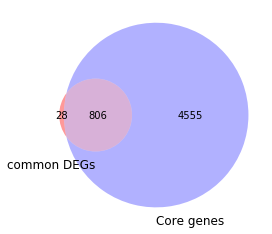

In [15]:
core_common_venn = venn2(
    [common_DEGs_set, pao1_core_set], set_labels=("common DEGs", "Core genes")
)

core_common_venn.get_patch_by_id("11").set_color("purple")
core_common_venn.get_patch_by_id("11").set_edgecolor("none")
core_common_venn.get_patch_by_id("11").set_alpha(0.3)
core_common_venn.get_patch_by_id("01").set_color("blue")
core_common_venn.get_patch_by_id("01").set_edgecolor("none")
core_common_venn.get_patch_by_id("01").set_alpha(0.3)

# Save figure
matplotlib.pyplot.savefig(
    "common_core_venn.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

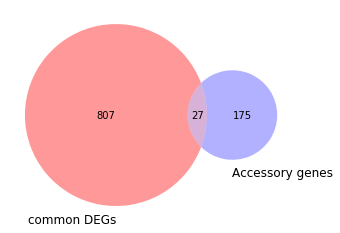

In [16]:
acc_common_venn = venn2(
    [common_DEGs_set, pao1_acc_set], set_labels=("common DEGs", "Accessory genes")
)

acc_common_venn.get_patch_by_id("11").set_color("purple")
acc_common_venn.get_patch_by_id("11").set_edgecolor("none")
acc_common_venn.get_patch_by_id("11").set_alpha(0.3)
acc_common_venn.get_patch_by_id("01").set_color("blue")
acc_common_venn.get_patch_by_id("01").set_edgecolor("none")
acc_common_venn.get_patch_by_id("01").set_alpha(0.3)

# Save figure
matplotlib.pyplot.savefig(
    "common_acc_venn.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

In [17]:
# Save data
common_DEGs_label.to_csv("common_DEGs_gene_group_labeled.tsv", sep="\t")

## Enrichment test

The [Fisher's exact test](https://en.wikipedia.org/wiki/Fisher%27s_exact_test) determines whether there is a significant association between two categorical variables in a contingency table (i.e two classifications of the data). Here we used use the Fisher’s exact test to determine if there is an association between the two classifications: common vs uncommon and core vs accessory. In other words, we want to determine if there is a statistically significant association between gene group and if a gene is common DEG. To do this we compare the ratio of core vs accessory genes that are common DEGs are significantly different to the ratio of core vs accessory that are not common DEGs.

Since the numbers are large, we also applied the $\chi^2$ test as an alternative to the Fisher's exact test.

In [18]:
# Make contingency table
# -----|common DEG   |not common DEGs
# core | # genes     | # genes
# acc  | # genes     | # genes

# Get not-common DEGs
all_pao1_genes = set(pao1_expression.columns)
not_common_DEGs_set = all_pao1_genes.difference(common_DEGs_set)

# Make components of contingency table
common_core_genes = common_DEGs_set.intersection(pao1_core_set)
common_acc_genes = common_DEGs_set.intersection(pao1_acc_set)
not_common_core_genes = not_common_DEGs_set.intersection(pao1_core_set)
not_common_acc_genes = not_common_DEGs_set.intersection(pao1_acc_set)

observed_contingency_table = np.array(
    [
        [len(common_core_genes), len(not_common_core_genes)],
        [len(common_acc_genes), len(not_common_acc_genes)],
    ]
)
observed_contingency_table

array([[ 806, 4555],
       [  27,  175]])

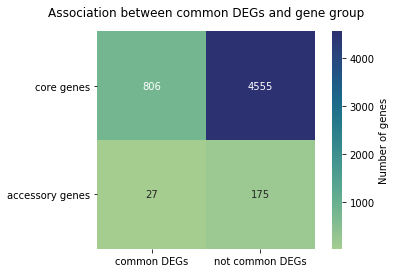

In [19]:
# Make heatmap of contingency table
observed_contingency_table_df = pd.DataFrame(
    data=observed_contingency_table,
    index=["core genes", "accessory genes"],
    columns=["common DEGs", "not common DEGs"],
)
f = sns.heatmap(
    observed_contingency_table_df,
    cmap=sns.color_palette("crest", as_cmap=True),
    cbar_kws={"label": "Number of genes"},
    square=True,
    annot=True,
    fmt=".4g",
)
f.set_yticklabels(f.get_yticklabels(), rotation=0)
f.set_title("Association between common DEGs and gene group", pad=15)

# Save figure
f.figure.savefig(
    "common_vs_gene_group_contingency_table.svg",
    format="svg",
    bbox_inches="tight",
    transparent=True,
    pad_inches=0,
    dpi=300,
)

In [24]:
# The two-sided p-value is the probability that, under the null hypothesis,
# a random table would have a probability equal to or less than the probability of the input table.
# The probability that we would observe this or an even more imbalanced ratio by chance is about ~61%

# There is a positive association based on the odds ratio, but the p-value is not signficant
oddsr, pval = scipy.stats.fisher_exact(
    observed_contingency_table, alternative="two-sided"
)

print(oddsr, pval)

1.1468878318494125 0.6151627980006971


In [21]:
chi2, pval, dof, expected_counts = scipy.stats.chi2_contingency(
    observed_contingency_table
)

print(chi2, pval)

0.304544936916084 0.5810470831740466


In [22]:
expected_counts

array([[ 802.75265145, 4558.24734855],
       [  30.24734855,  171.75265145]])

**Takeaway:**

* Based on the venn diagrams, it looks like most common DEGs are core, as expected. Since it is thought that these core genes encode essential functions shared by all strains, it would make sense that these core genes are also those commonly DEGs.
* Based on the Fisher's exact test, there is an odds ratio >1 indicating that there is a positive relationship between a gene being common DEGs and a gene being core vs accessory. However the p-value is not significant. The $\chi^2$ test also finds that there is not a significant association between common DEGs and gene group.
    * This [paper](https://www.d.umn.edu/~tpederse/Pubs/scsug96.pdf) talks about the p-values obtained from the Fisher's exact tests are reliable compared to asymptotic test results when dealing with skewed/unbalanced datasets. Furthermore, [this blog](https://courses.lumenlearning.com/boundless-statistics/chapter/the-chi-squared-test/) suggests that while a $\chi^2$ test is recommended for large datasets, like what we have, in the case where the dataset is skewed/unbalanced the p-values for the Fisher's exact test are more reliable.